In [ ]:
!pip install vaderSentiment

In [ ]:
#Manipulação dos Dados
import pandas as pd
import numpy as np

#Visualização
import missingno
import matplotlib.pyplot as plt
import seaborn as sns

#Expressões Regulares
import re
import string

#Processamento de Linguagem Natural
import nltk

nltk.download('vader_lexicon')
nltk.download('stopwords')
from nltk.stem.porter import *
nltk.download('wordnet')  

from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df = pd.read_csv("vaccination_tweets.csv")

In [ ]:
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.shape

(8082, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8082 entries, 0 to 8081
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                8082 non-null   int64 
 1   user_name         8082 non-null   object
 2   user_location     6452 non-null   object
 3   user_description  7576 non-null   object
 4   user_created      8082 non-null   object
 5   user_followers    8082 non-null   int64 
 6   user_friends      8082 non-null   int64 
 7   user_favourites   8082 non-null   int64 
 8   user_verified     8082 non-null   bool  
 9   date              8082 non-null   object
 10  text              8082 non-null   object
 11  hashtags          6133 non-null   object
 12  source            8081 non-null   object
 13  retweets          8082 non-null   int64 
 14  favorites         8082 non-null   int64 
 15  is_retweet        8082 non-null   bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 899.9+ KB


In [ ]:
df.describe()

,id,user_followers,user_friends,user_favourites,retweets,favorites
count,8.082000e+03,8.082000e+03,8082.000000,8.082000e+03,8082.000000,8082.000000
mean,1.354990e+18,3.550042e+04,1192.207127,1.513661e+04,1.472037,8.690671
std,1.265681e+16,2.914947e+05,2982.597309,4.882913e+04,12.922145,59.121769
min,1.337728e+18,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,1.344901e+18,1.100000e+02,165.000000,4.172500e+02,0.000000,0.000000
50%,1.351682e+18,4.805000e+02,465.000000,2.329000e+03,0.000000,1.000000
75%,1.364592e+18,2.089750e+03,1249.500000,1.124975e+04,1.000000,4.000000
max,1.384788e+18,1.371493e+07,103226.000000,1.166459e+06,678.000000,2315.000000


In [ ]:
df.describe(include = "O")

,user_name,user_location,user_description,user_created,date,text,hashtags,source
count,8082,6452,7576,8082,8082,8082,6133,8081
unique,5350,2380,5097,5335,8073,8075,3413,50
top,New Straits Times,"London, England","News, views and up-to-date reports from Malays...",2009-07-09 09:04:01,2020-12-24 17:09:01,#Covid19 Vaccine Rollout Needs Spark Even More...,['PfizerBioNTech'],Twitter for iPhone
freq,78,124,78,78,2,5,886,2864


## Avaliar dados faltantes

In [ ]:
df.isnull().any()

id                  False
user_name           False
user_location        True
user_description     True
user_created        False
user_followers      False
user_friends        False
user_favourites     False
user_verified       False
date                False
text                False
hashtags             True
source               True
retweets            False
favorites           False
is_retweet          False
dtype: bool

In [ ]:
df.isnull().sum()

id                     0
user_name              0
user_location       1630
user_description     506
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            1949
source                 1
retweets               0
favorites              0
is_retweet             0
dtype: int64

In [ ]:
df.isnull().sum().sort_values(ascending=False)

hashtags            1949
user_location       1630
user_description     506
source                 1
is_retweet             0
favorites              0
retweets               0
text                   0
date                   0
user_verified          0
user_favourites        0
user_friends           0
user_followers         0
user_created           0
user_name              0
id                     0
dtype: int64

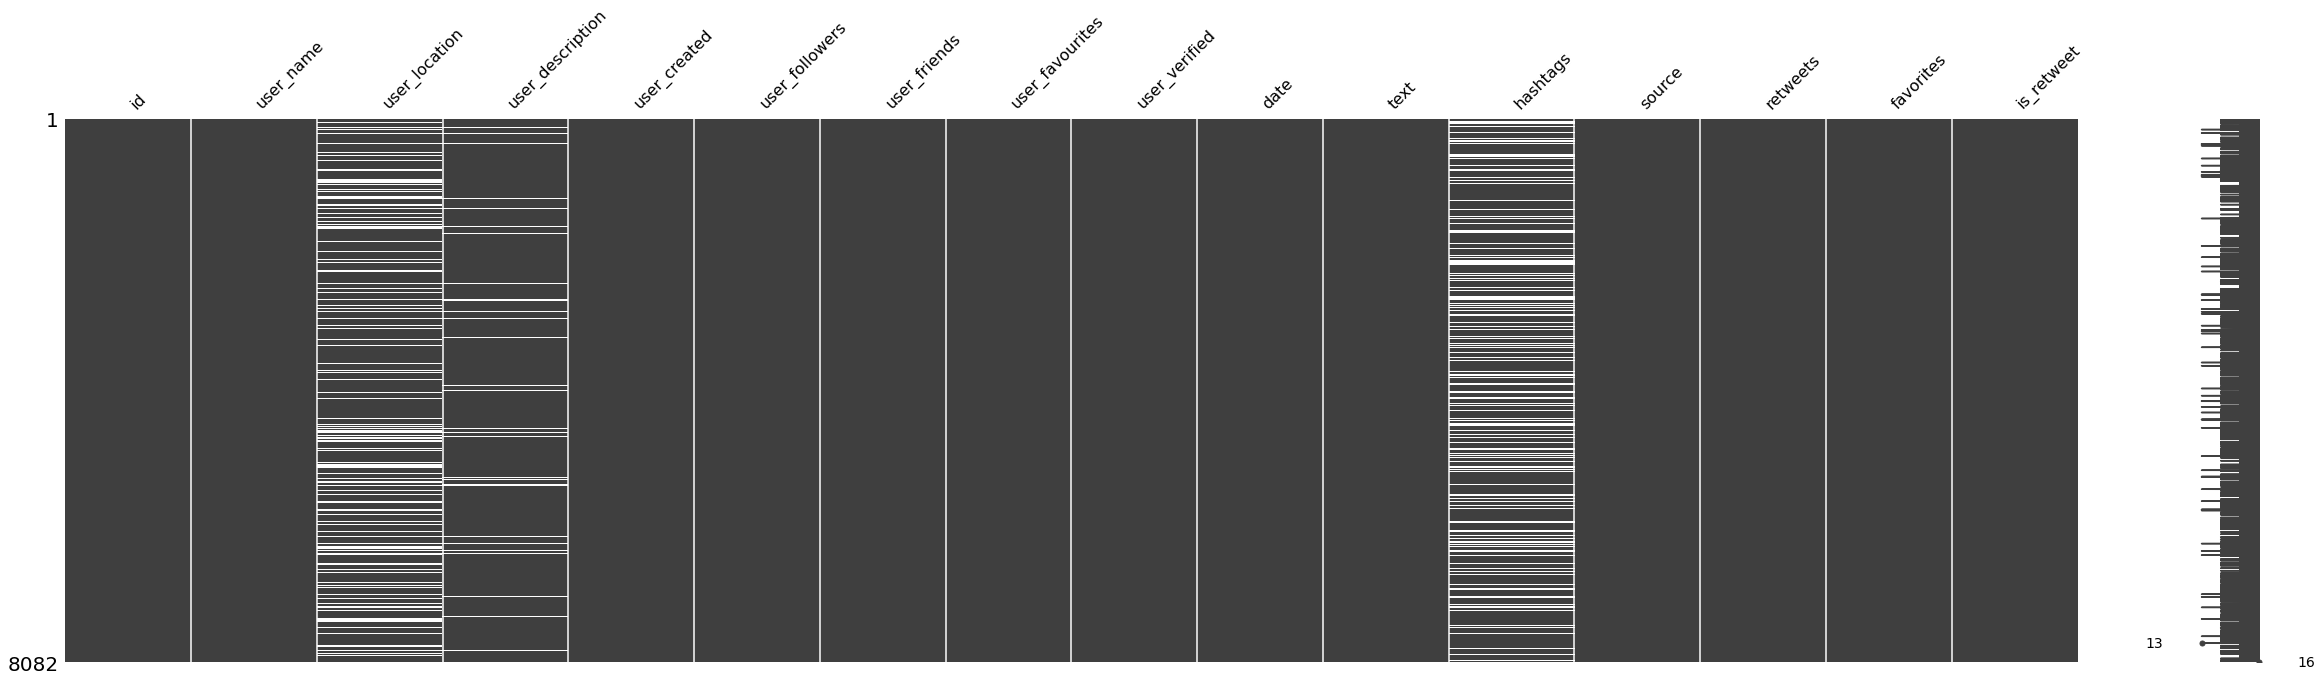

In [ ]:
missingno.matrix(df, figsize = (40,10))

In [ ]:
df[df.isnull().any(axis=1)].head(10)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False
5,1337852648389832708,Dee,"Birmingham, England","Gastroenterology trainee, Clinical Research Fe...",2020-01-26 21:43:12,105,108,106,False,2020-12-12 20:11:42,Does anyone have any useful advice/guidance fo...,NaN,Twitter for iPhone,0,0,False
7,1337850832256176136,Dr.Krutika Kuppalli,NaN,"ID, Global Health, VHF, Pandemic Prep, Emergin...",2019-03-25 04:14:29,21924,593,7815,True,2020-12-12 20:04:29,There have not been many bright days in 2020 b...,"['BidenHarris', 'Election2020']",Twitter for iPhone,2,22,False
8,1337850023531347969,Erin Despas,NaN,Designing&selling on Teespring. Like 90s Disne...,2009-10-30 17:53:54,887,1515,9639,False,2020-12-12 20:01:16,Covid vaccine; You getting it?\n\n #CovidVacci...,"['CovidVaccine', 'covid19', 'PfizerBioNTech', ...",Twitter Web App,2,1,False
11,1337840331522453507,VoiceM,NaN,campaigner & optimistic realist,2020-08-31 10:38:21,2,25,20,False,2020-12-12 19:22:45,@cnnbrk #COVID19 #CovidVaccine #vaccine #Coron...,"['COVID19', 'CovidVaccine', 'vaccine', 'Corona...",Twitter Web App,0,0,False
12,1337815730486702087,WION,India,#WION: World Is One | Welcome to India’s first...,2016-03-21 03:44:54,292510,91,7531,True,2020-12-12 17:45:00,The agency also released new information for h...,NaN,TweetDeck,0,18,False
13,1337809196453081088,Dr.Krutika Kuppalli,NaN,"ID, Global Health, VHF, Pandemic Prep, Emergin...",2019-03-25 04:14:29,21924,593,7815,True,2020-12-12 17:19:02,For all the women and healthcare providers who...,['PfizerBioNTech'],Twitter for iPhone,48,82,False
14,1337807109010780162,Opoyi,NaN,High-quality trusted conversations around news...,2019-01-13 18:33:22,10332,49,16,False,2020-12-12 17:10:44,"""Expect 145 sites across all the states to rec...",NaN,TweetDeck,0,0,False


In [ ]:
df.shape

(8082, 16)

In [ ]:
linhas, colunas = df.shape

In [ ]:
print(linhas)

8082


In [ ]:
print(colunas)

16


In [ ]:
percentual_faltantes = (df.isnull().sum()/linhas) * 100

In [ ]:
print(percentual_faltantes)

id                   0.000000
user_name            0.000000
user_location       20.168275
user_description     6.260827
user_created         0.000000
user_followers       0.000000
user_friends         0.000000
user_favourites      0.000000
user_verified        0.000000
date                 0.000000
text                 0.000000
hashtags            24.115318
source               0.012373
retweets             0.000000
favorites            0.000000
is_retweet           0.000000
dtype: float64


In [ ]:
df = df.dropna()

In [ ]:
df.shape

(4749, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4749 entries, 0 to 8081
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                4749 non-null   int64 
 1   user_name         4749 non-null   object
 2   user_location     4749 non-null   object
 3   user_description  4749 non-null   object
 4   user_created      4749 non-null   object
 5   user_followers    4749 non-null   int64 
 6   user_friends      4749 non-null   int64 
 7   user_favourites   4749 non-null   int64 
 8   user_verified     4749 non-null   bool  
 9   date              4749 non-null   object
 10  text              4749 non-null   object
 11  hashtags          4749 non-null   object
 12  source            4749 non-null   object
 13  retweets          4749 non-null   int64 
 14  favorites         4749 non-null   int64 
 15  is_retweet        4749 non-null   bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 565.8+ KB


In [ ]:
df["user_created"] = pd.to_datetime(df["user_created"], format = '%Y-%m-%d %H:%M:%S' )
df["date"] = pd.to_datetime(df["date"], format = '%Y-%m-%d %H:%M:%S' )

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4749 entries, 0 to 8081
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                4749 non-null   int64         
 1   user_name         4749 non-null   object        
 2   user_location     4749 non-null   object        
 3   user_description  4749 non-null   object        
 4   user_created      4749 non-null   datetime64[ns]
 5   user_followers    4749 non-null   int64         
 6   user_friends      4749 non-null   int64         
 7   user_favourites   4749 non-null   int64         
 8   user_verified     4749 non-null   bool          
 9   date              4749 non-null   datetime64[ns]
 10  text              4749 non-null   object        
 11  hashtags          4749 non-null   object        
 12  source            4749 non-null   object        
 13  retweets          4749 non-null   int64         
 14  favorites         4749 n

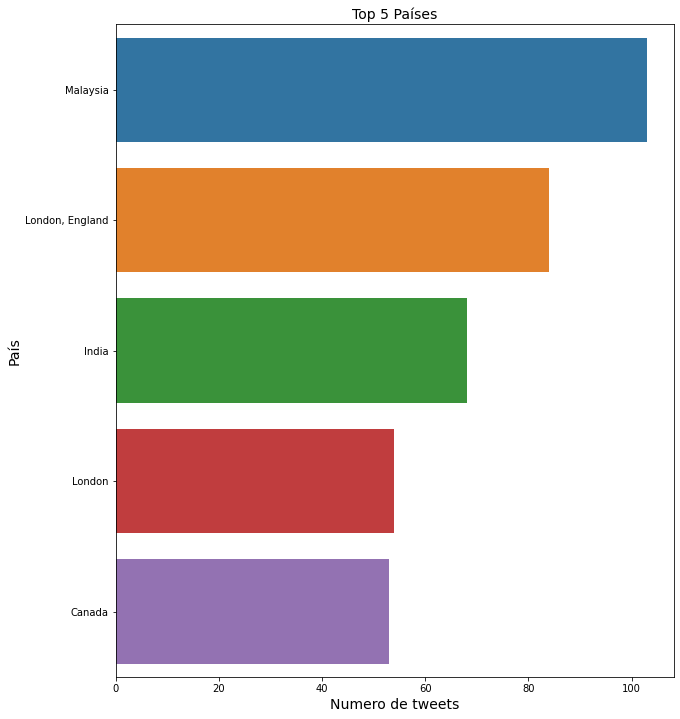

In [ ]:
plt.figure(figsize=(10,12))
sns.barplot(df["user_location"].value_counts().values[0:5], df["user_location"].value_counts().index[0:5]);
plt.title("Top 5 Países", fontsize = 14)
plt.xlabel("Numero de tweets", fontsize = 14)
plt.ylabel("País", fontsize = 14)
plt.show()

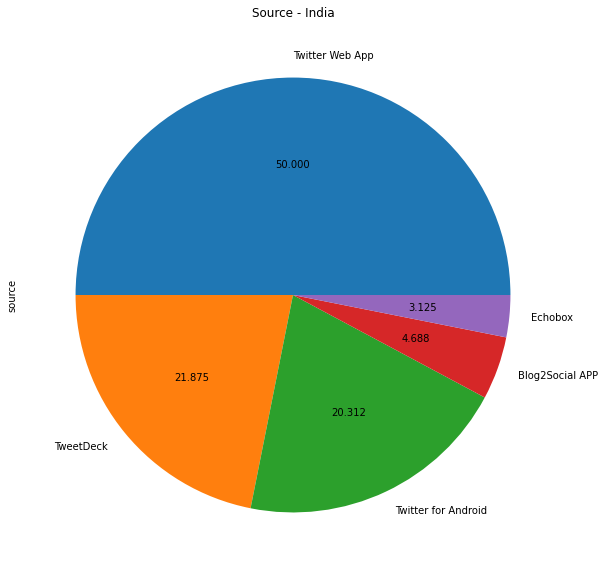

In [ ]:
graf_pizza = df["source"][df["user_location"] == "India"].value_counts().sort_values(ascending=False)
plt.figure(figsize=(10,10))
graf_pizza[0:5].plot(kind= "pie", title = "Source - India", autopct = '%.3f')
plt.show()

In [ ]:
L = ["year", 'month', 'day', 'dayofweek', 'dayofyear', 'weekofyear', 'quarter']
df = df.join(pd.concat((getattr(df["date"].dt, i).rename(i) for i in L), axis = 1))

In [ ]:
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,year,month,day,dayofweek,dayofyear,weekofyear,quarter
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False,2020,12,20,6,355,51,4
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,2020,12,12,5,347,50,4
6,1337851215875608579,Gunther Fehlinger,"Austria, Ukraine and Kosovo",End North Stream 2 now - the pipeline of corru...,2013-06-10 17:49:22,2731,5001,69344,False,2020-12-12 20:06:00,it is a bit sad to claim the fame for success ...,['vaccination'],Twitter Web App,0,4,False,2020,12,12,5,347,50,4
9,1337842295857623042,Ch.Amjad Ali,Islamabad,#ProudPakistani #LovePakArmy #PMIK @insafiansp...,2012-11-12 04:18:12,671,2368,20469,False,2020-12-12 19:30:33,#CovidVaccine \n\nStates will start getting #C...,"['CovidVaccine', 'COVID19Vaccine', 'US', 'paku...",Twitter Web App,0,0,False,2020,12,12,5,347,50,4
10,1337841934170255365,Tamer Yazar,Turkey-Israel,"Im Market Analyst, also Editor... working (fre...",2009-09-17 16:45:16,1302,78,339,False,2020-12-12 19:29:07,"while deaths are closing in on the 300,000 mar...","['PfizerBioNTech', 'Vaccine']",Twitter Web App,0,0,False,2020,12,12,5,347,50,4


In [ ]:
df["text"]

0       Same folks said daikon paste could treat a cyt...
2       #coronavirus #SputnikV #AstraZeneca #PfizerBio...
6       it is a bit sad to claim the fame for success ...
9       #CovidVaccine \n\nStates will start getting #C...
10      while deaths are closing in on the 300,000 mar...
                              ...                        
8073    @narendramodi\n#5Qs 1146th set\nSir\nWud #fore...
8074    @CNBCTV18News @ShereenBhan WTF is this? Is he ...
8079    Second #PfizerBioNTech vaccine shot done! Than...
8080    Second #PfizerBioNTech vaccine is officially i...
8081    @mid_day #DGCI why not allow other proven Vacc...
Name: text, Length: 4749, dtype: object

In [ ]:
def limpeza_do_texto(text):
  text = re.sub('\n', '', text)
  text = re.sub('@[^\s]+', '', text)
  text = re.sub('\B#\S+', '', text)
  return text

In [ ]:
df["text"] = df['text'].apply(lambda x:limpeza_do_texto(x))

In [ ]:
df["text"]

0       Same folks said daikon paste could treat a cyt...
2             Russian vaccine is created to last 2-4 y...
6       it is a bit sad to claim the fame for success ...
9        States will start getting  Monday,  says     ...
10      while deaths are closing in on the 300,000 mar...
                              ...                        
8073     1146th setSirWud   entry enrich  Wud it help ...
8074      WTF is this? Is he playing a Ping Pong Game?...
8079    Second  vaccine shot done! Thanks  💉  https://...
8080    Second  vaccine is officially in! 💉Thank you  ...
8081          why not allow other proven Vaccines like   
Name: text, Length: 4749, dtype: object

In [ ]:
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,year,month,day,dayofweek,dayofyear,weekofyear,quarter
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False,2020,12,20,6,355,51,4
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,Russian vaccine is created to last 2-4 y...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,2020,12,12,5,347,50,4
6,1337851215875608579,Gunther Fehlinger,"Austria, Ukraine and Kosovo",End North Stream 2 now - the pipeline of corru...,2013-06-10 17:49:22,2731,5001,69344,False,2020-12-12 20:06:00,it is a bit sad to claim the fame for success ...,['vaccination'],Twitter Web App,0,4,False,2020,12,12,5,347,50,4
9,1337842295857623042,Ch.Amjad Ali,Islamabad,#ProudPakistani #LovePakArmy #PMIK @insafiansp...,2012-11-12 04:18:12,671,2368,20469,False,2020-12-12 19:30:33,"States will start getting Monday, says ...","['CovidVaccine', 'COVID19Vaccine', 'US', 'paku...",Twitter Web App,0,0,False,2020,12,12,5,347,50,4
10,1337841934170255365,Tamer Yazar,Turkey-Israel,"Im Market Analyst, also Editor... working (fre...",2009-09-17 16:45:16,1302,78,339,False,2020-12-12 19:29:07,"while deaths are closing in on the 300,000 mar...","['PfizerBioNTech', 'Vaccine']",Twitter Web App,0,0,False,2020,12,12,5,347,50,4


In [ ]:
analisador_de_texto = SentimentIntensityAnalyzer()

In [ ]:
quantidade_tweets = (len(df["text"]))

In [ ]:
print(quantidade_tweets)

4749


In [ ]:
sid = SIA()

In [ ]:
sid

In [ ]:
df['sentiments'] = df['text'].apply(lambda x: sid.polarity_scores(' '.join(re.findall(r'\w+', x.lower()))))
#df['sentiments'] = df['text'].apply(lambda x: sid.polarity_scores)

In [ ]:
df['sentiments']

0       {'neg': 0.0, 'neu': 0.803, 'pos': 0.197, 'comp...
2       {'neg': 0.0, 'neu': 0.818, 'pos': 0.182, 'comp...
6       {'neg': 0.108, 'neu': 0.662, 'pos': 0.23, 'com...
9       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
10      {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
                              ...                        
8073    {'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'comp...
8074    {'neg': 0.176, 'neu': 0.741, 'pos': 0.083, 'co...
8079    {'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'comp...
8080    {'neg': 0.0, 'neu': 0.857, 'pos': 0.143, 'comp...
8081    {'neg': 0.182, 'neu': 0.545, 'pos': 0.273, 'co...
Name: sentiments, Length: 4749, dtype: object

In [ ]:
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,year,month,day,dayofweek,dayofyear,weekofyear,quarter,sentiments
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False,2020,12,20,6,355,51,4,"{'neg': 0.0, 'neu': 0.803, 'pos': 0.197, 'comp..."
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,Russian vaccine is created to last 2-4 y...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,2020,12,12,5,347,50,4,"{'neg': 0.0, 'neu': 0.818, 'pos': 0.182, 'comp..."
6,1337851215875608579,Gunther Fehlinger,"Austria, Ukraine and Kosovo",End North Stream 2 now - the pipeline of corru...,2013-06-10 17:49:22,2731,5001,69344,False,2020-12-12 20:06:00,it is a bit sad to claim the fame for success ...,['vaccination'],Twitter Web App,0,4,False,2020,12,12,5,347,50,4,"{'neg': 0.108, 'neu': 0.662, 'pos': 0.23, 'com..."
9,1337842295857623042,Ch.Amjad Ali,Islamabad,#ProudPakistani #LovePakArmy #PMIK @insafiansp...,2012-11-12 04:18:12,671,2368,20469,False,2020-12-12 19:30:33,"States will start getting Monday, says ...","['CovidVaccine', 'COVID19Vaccine', 'US', 'paku...",Twitter Web App,0,0,False,2020,12,12,5,347,50,4,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
10,1337841934170255365,Tamer Yazar,Turkey-Israel,"Im Market Analyst, also Editor... working (fre...",2009-09-17 16:45:16,1302,78,339,False,2020-12-12 19:29:07,"while deaths are closing in on the 300,000 mar...","['PfizerBioNTech', 'Vaccine']",Twitter Web App,0,0,False,2020,12,12,5,347,50,4,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [ ]:
df['positive_sentiment'] = df['sentiments'].apply(lambda x: x['pos'])

In [ ]:
df['neutral_sentimet'] = df['sentiments'].apply(lambda x: x['neu'])

In [ ]:
df['negative_sentiment'] = df['sentiments'].apply(lambda x: x['neg'])

In [ ]:
df['compound'] = df['sentiments'].apply(lambda x: x["compound"])

In [ ]:
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,year,month,day,dayofweek,dayofyear,weekofyear,quarter,sentiments,positive_sentiment,neutral_sentimet,negative_sentiment,compound
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False,2020,12,20,6,355,51,4,"{'neg': 0.0, 'neu': 0.803, 'pos': 0.197, 'comp...",0.197,0.803,0.000,0.4019
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,Russian vaccine is created to last 2-4 y...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,2020,12,12,5,347,50,4,"{'neg': 0.0, 'neu': 0.818, 'pos': 0.182, 'comp...",0.182,0.818,0.000,0.2500
6,1337851215875608579,Gunther Fehlinger,"Austria, Ukraine and Kosovo",End North Stream 2 now - the pipeline of corru...,2013-06-10 17:49:22,2731,5001,69344,False,2020-12-12 20:06:00,it is a bit sad to claim the fame for success ...,['vaccination'],Twitter Web App,0,4,False,2020,12,12,5,347,50,4,"{'neg': 0.108, 'neu': 0.662, 'pos': 0.23, 'com...",0.230,0.662,0.108,0.5423
9,1337842295857623042,Ch.Amjad Ali,Islamabad,#ProudPakistani #LovePakArmy #PMIK @insafiansp...,2012-11-12 04:18:12,671,2368,20469,False,2020-12-12 19:30:33,"States will start getting Monday, says ...","['CovidVaccine', 'COVID19Vaccine', 'US', 'paku...",Twitter Web App,0,0,False,2020,12,12,5,347,50,4,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
10,1337841934170255365,Tamer Yazar,Turkey-Israel,"Im Market Analyst, also Editor... working (fre...",2009-09-17 16:45:16,1302,78,339,False,2020-12-12 19:29:07,"while deaths are closing in on the 300,000 mar...","['PfizerBioNTech', 'Vaccine']",Twitter Web App,0,0,False,2020,12,12,5,347,50,4,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000


In [ ]:
sentimento = []

In [ ]:
type(sentimento)

list

In [ ]:
for i in df.compound:
  if i >= 0.05:
    sentimento.append("Positive")
  elif i <= (-0.05):
    sentimento.append("Negative")
  else:
    sentimento.append("Neutral")

In [ ]:
print(sentimento)

['Positive', 'Positive', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Negative', 'Negative', 'Positive', 'Neutral', 'Negative', 'Neutral', 'Positive', 'Positive', 'Neutral', 'Negative', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Negative', 'Negative', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Negative', 'Negative', 'Neutral', 'Positive', 'Negative', 'Negative', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Positive', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Positive', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Positive', 'Neutral', 'Neutral', 'Positive', 'Neutra

In [ ]:
df['sent'] = pd.Series(np.array(sentimento))

In [ ]:
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,year,month,day,dayofweek,dayofyear,weekofyear,quarter,sentiments,positive_sentiment,neutral_sentimet,negative_sentiment,compound,sent
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False,2020,12,20,6,355,51,4,"{'neg': 0.0, 'neu': 0.803, 'pos': 0.197, 'comp...",0.197,0.803,0.000,0.4019,Positive
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,Russian vaccine is created to last 2-4 y...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,2020,12,12,5,347,50,4,"{'neg': 0.0, 'neu': 0.818, 'pos': 0.182, 'comp...",0.182,0.818,0.000,0.2500,Positive
6,1337851215875608579,Gunther Fehlinger,"Austria, Ukraine and Kosovo",End North Stream 2 now - the pipeline of corru...,2013-06-10 17:49:22,2731,5001,69344,False,2020-12-12 20:06:00,it is a bit sad to claim the fame for success ...,['vaccination'],Twitter Web App,0,4,False,2020,12,12,5,347,50,4,"{'neg': 0.108, 'neu': 0.662, 'pos': 0.23, 'com...",0.230,0.662,0.108,0.5423,Neutral
9,1337842295857623042,Ch.Amjad Ali,Islamabad,#ProudPakistani #LovePakArmy #PMIK @insafiansp...,2012-11-12 04:18:12,671,2368,20469,False,2020-12-12 19:30:33,"States will start getting Monday, says ...","['CovidVaccine', 'COVID19Vaccine', 'US', 'paku...",Twitter Web App,0,0,False,2020,12,12,5,347,50,4,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,Negative
10,1337841934170255365,Tamer Yazar,Turkey-Israel,"Im Market Analyst, also Editor... working (fre...",2009-09-17 16:45:16,1302,78,339,False,2020-12-12 19:29:07,"while deaths are closing in on the 300,000 mar...","['PfizerBioNTech', 'Vaccine']",Twitter Web App,0,0,False,2020,12,12,5,347,50,4,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,Positive


In [ ]:
def limpa_texto(text):
  text = str(text).lower()
  text = re.sub('[%s]' % re.escape(string.punctuation), "", text)

  return text

In [ ]:
df['text'] = df['text'].apply(lambda x: limpa_texto(x))

In [ ]:
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,year,month,day,dayofweek,dayofyear,weekofyear,quarter,sentiments,positive_sentiment,neutral_sentimet,negative_sentiment,compound,sent
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False,2020,12,20,6,355,51,4,"{'neg': 0.0, 'neu': 0.803, 'pos': 0.197, 'comp...",0.197,0.803,0.000,0.4019,Positive
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,russian vaccine is created to last 24 ye...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,2020,12,12,5,347,50,4,"{'neg': 0.0, 'neu': 0.818, 'pos': 0.182, 'comp...",0.182,0.818,0.000,0.2500,Positive
6,1337851215875608579,Gunther Fehlinger,"Austria, Ukraine and Kosovo",End North Stream 2 now - the pipeline of corru...,2013-06-10 17:49:22,2731,5001,69344,False,2020-12-12 20:06:00,it is a bit sad to claim the fame for success ...,['vaccination'],Twitter Web App,0,4,False,2020,12,12,5,347,50,4,"{'neg': 0.108, 'neu': 0.662, 'pos': 0.23, 'com...",0.230,0.662,0.108,0.5423,Neutral
9,1337842295857623042,Ch.Amjad Ali,Islamabad,#ProudPakistani #LovePakArmy #PMIK @insafiansp...,2012-11-12 04:18:12,671,2368,20469,False,2020-12-12 19:30:33,states will start getting monday says h...,"['CovidVaccine', 'COVID19Vaccine', 'US', 'paku...",Twitter Web App,0,0,False,2020,12,12,5,347,50,4,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,Negative
10,1337841934170255365,Tamer Yazar,Turkey-Israel,"Im Market Analyst, also Editor... working (fre...",2009-09-17 16:45:16,1302,78,339,False,2020-12-12 19:29:07,while deaths are closing in on the 300000 mark...,"['PfizerBioNTech', 'Vaccine']",Twitter Web App,0,0,False,2020,12,12,5,347,50,4,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,Positive


In [ ]:
def tokenization(text):
  text = re.split('\W+', text)
  return text

In [ ]:
df_text = pd.DataFrame()

In [ ]:
df_text['text'] = df['text']

In [ ]:
df_text.head()

,text
0,same folks said daikon paste could treat a cyt...
2,russian vaccine is created to last 24 ye...
6,it is a bit sad to claim the fame for success ...
9,states will start getting monday says h...
10,while deaths are closing in on the 300000 mark...


In [ ]:
df_text["tokenization"] = df_text['text'].apply(lambda x: tokenization(x.lower()))

In [ ]:
df_text.head()

,text,tokenization
0,same folks said daikon paste could treat a cyt...,"[same, folks, said, daikon, paste, could, trea..."
2,russian vaccine is created to last 24 ye...,"[, russian, vaccine, is, created, to, last, 24..."
6,it is a bit sad to claim the fame for success ...,"[it, is, a, bit, sad, to, claim, the, fame, fo..."
9,states will start getting monday says h...,"[, states, will, start, getting, monday, says,..."
10,while deaths are closing in on the 300000 mark...,"[while, deaths, are, closing, in, on, the, 300..."


In [ ]:
stopwords = nltk.corpus.stopwords.words('english')

In [ ]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
def excluir_stopwords(text):
  text = [i for i in text if i not in stopwords]
  return text

In [ ]:
df_text['sem_stopwords'] = df_text['tokenization'].apply(lambda x: excluir_stopwords(x))

In [ ]:
df_text

,text,tokenization,sem_stopwords
0,same folks said daikon paste could treat a cyt...,"[same, folks, said, daikon, paste, could, trea...","[folks, said, daikon, paste, could, treat, cyt..."
2,russian vaccine is created to last 24 ye...,"[, russian, vaccine, is, created, to, last, 24...","[, russian, vaccine, created, last, 24, years,..."
6,it is a bit sad to claim the fame for success ...,"[it, is, a, bit, sad, to, claim, the, fame, fo...","[bit, sad, claim, fame, success, patriotic, co..."
9,states will start getting monday says h...,"[, states, will, start, getting, monday, says,...","[, states, start, getting, monday, says, https..."
10,while deaths are closing in on the 300000 mark...,"[while, deaths, are, closing, in, on, the, 300...","[deaths, closing, 300000, mark, millions, peop..."
...,...,...,...
8073,1146th setsirwud entry enrich wud it help ...,"[, 1146th, setsirwud, entry, enrich, wud, it, ...","[, 1146th, setsirwud, entry, enrich, wud, help..."
8074,wtf is this is he playing a ping pong game ...,"[, wtf, is, this, is, he, playing, a, ping, po...","[, wtf, playing, ping, pong, game, holding, ba..."
8079,second vaccine shot done thanks 💉 httpstcos...,"[second, vaccine, shot, done, thanks, httpstco...","[second, vaccine, shot, done, thanks, httpstco..."
8080,second vaccine is officially in 💉thank you a...,"[second, vaccine, is, officially, in, thank, y...","[second, vaccine, officially, thank, amp, heal..."


In [ ]:
temp = df.groupby('sent').count()['text'].reset_index().sort_values(by="text", ascending=False)
temp.style.background_gradient()

,sent,text
1,Neutral,1216
2,Positive,1083
0,Negative,428


In [ ]:
4749